![](img/572_banner.png)

# Lecture 3: Stochastic Gradient Descent

**Tomas Beuzen, January 2021**

![](img/random.png)

## Lecture Outline
<hr>

<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-Learning-Objectives" data-toc-modified-id="Lecture-Learning-Objectives-2">Lecture Learning Objectives</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li><li><span><a href="#1.-Motivation-for-Stochastic-Gradient-Descent" data-toc-modified-id="1.-Motivation-for-Stochastic-Gradient-Descent-4">1. Motivation for Stochastic Gradient Descent</a></span></li><li><span><a href="#2.-Stochastic-Gradient-Descent" data-toc-modified-id="2.-Stochastic-Gradient-Descent-5">2. Stochastic Gradient Descent</a></span></li><li><span><a href="#3.-Mini-batch-Gradient-Descent" data-toc-modified-id="3.-Mini-batch-Gradient-Descent-6">3. Mini-batch Gradient Descent</a></span></li><li><span><a href="#4.-Terminology" data-toc-modified-id="4.-Terminology-7">4. Terminology</a></span></li><li><span><a href="#5.-Final-Remarks" data-toc-modified-id="5.-Final-Remarks-8">5. Final Remarks</a></span></li><li><span><a href="#6.-Lecture-Exercise:-True/False-Questions" data-toc-modified-id="6.-Lecture-Exercise:-True/False-Questions-9">6. Lecture Exercise: True/False Questions</a></span></li><li><span><a href="#7.-The-Lecture-in-Three-Conjectures" data-toc-modified-id="7.-The-Lecture-in-Three-Conjectures-10">7. The Lecture in Three Conjectures</a></span></li></ul></div>

## Lecture Learning Objectives
<hr>

- Explain and implement the stochastic gradient descent algorithm
- Explain the advantages and disadvantages of stochastic gradient descent as compared to gradient descent
- Explain what are epochs, batch sizes, iterations, and computations in the context of gradient descent and stochastic gradient descent

## Imports
<hr>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utils.plotting import *

## 1. Motivation for Stochastic Gradient Descent
<hr>

- Last lecture we looked at "vanilla" gradient descent
- Almost all loss functions you'll use in ML involve a sum over all the (training) data, e.g., mean squared error:

$$f(w)=\frac{1}{n}\sum^{n}_{i=1}(h_w(x_i)-y_i)^2$$

- Here $f(w)$ is the value of the loss function, $h_w(x)$ is the model we wish to fit, e.g., for linear regression: $h_w(x)=w^Tx$
- The goal is to find the weights $\boldsymbol{w}$ that minimize the loss function
- With gradient descent we:
    1. start with some arbitrary $\boldsymbol{w}$
    2. calculate the gradient using all training examples
    3. use the gradient to adjust $\boldsymbol{w}$
    4. repeat for $I$ iterations or until the step-size is sufficiently small
- But if we have large $n$ and/or $\boldsymbol{w}$ vanilla gradient descent becomes very computationally expensive (when we get to deep learning, we'll have models where the number of weights to optimize is in the millions!)
- Say `n` = 1,000,000, we have 1000 parameters to optimize, and we do 1000 iterations = $10^{12}$ computations!!
- We can reduce this workload by using just a fraction of our dataset to update our parameters each iteration (rather than using the whole data set)
- This is called "stochastic gradient descent"

## 2. Stochastic Gradient Descent
<hr>

- Gradient Descent:
$$w_{j+1}=w_{j}-\alpha_t\frac{\partial}{\partial w_j}f(w_j)$$
- Stochastic Gradient Descent:
$$w_{j+1}=w_{j}-\alpha_t\frac{\partial}{\partial w_j}f_i(w_j)$$
- Pretty simple!
- What exactly is the difference in the above equations? Well one of them includes a subscript $i$
- That means, instead of updating our parameters based on a gradient calculated using all training data, we simply use **one of our data points** (the $i$th one)
- This is best seen by example, let's use the Pokemon dataset from last week:

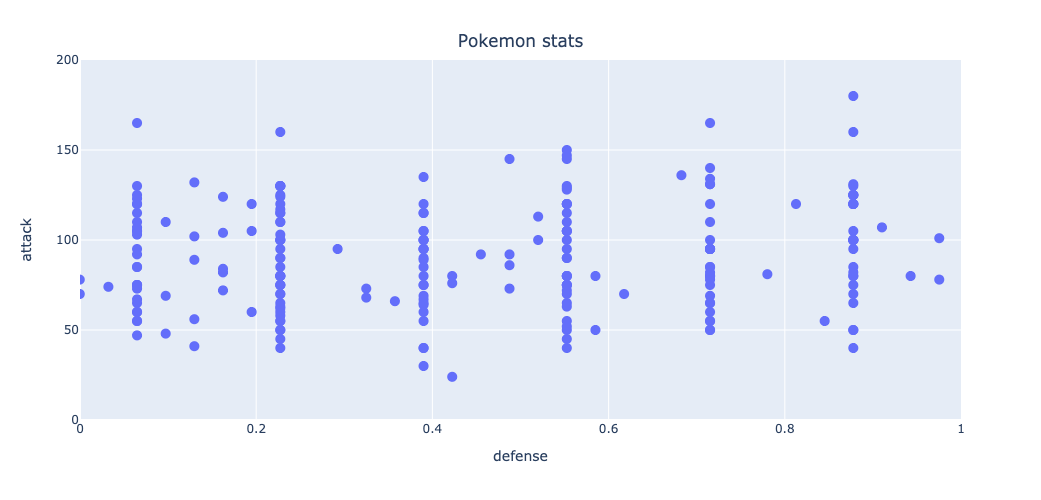

In [3]:
df = (pd.read_csv("data/pokemon.csv", usecols=['name', 'defense', 'attack'], index_col=0)
        .reset_index()
     )
x = StandardScaler().fit_transform(df[['defense']]).flatten()
y = df['attack'].to_numpy()
plot_pokemon(x, y, x_range=[0, 1], y_range=[0, 200], dx=0.2, dy=50)

- Let's fit a simple linear model to this data: $\hat{y_i}=w_0+w_1x_i=w^Tx_i$
- Recall from last lecture that the gradient of MSE for a linear regression model is:

$$\frac{\partial{}}{\partial{}f(w)}=\frac{2}{n}\sum^{n}_{i=1}(w^Tx_i-y_i)x_i$$

In [4]:
def gradient(w, X, y):
    """Gradient of mean squared error."""
    return 2 * (X.T @ (X @ w) - X.T @ y) / len(X)

- Let's use the "column of ones trick" to add a column of ones to our feature data to represent the intercept term:

In [5]:
X = np.hstack((np.ones((len(x), 1)), x[:, None]))
X

array([[ 1.        , -0.78077335],
       [ 1.        , -0.32548801],
       [ 1.        ,  1.62573488],
       ...,
       [ 1.        , -0.65069183],
       [ 1.        ,  0.91028648],
       [ 1.        ,  1.36557183]])

- Let's calculate the gradient for parameters `(w0, w1)` = `(-20, -5)` using the full data set:

In [7]:
w = np.array([-20, -5])
gradient(w, X, y)

array([-195.71535581,  -40.14066881])

- And now let's calculate the gradient again using just a single random point (re-run this as many times as you like):

In [24]:
i = np.random.randint(0, len(X), 1)
print("Selected point:")
display(df.iloc[i])
print("      Gradient: [intercept, slope]")
print(f"      All data: {[round(_, 2) for _ in gradient(w, X, y)]}")
print(f"Data point {i[0]:03}: {[round(_, 2) for _ in gradient(w, X[i], y[i])]}")

Selected point:


name  attack  defense
765  Passimian     120       90

      Gradient: [intercept, slope]
      All data: [-195.72, -40.14]
Data point 765: [-285.53, -157.77]


- Not surprisingly, the gradient calculated using just one data point is (usually) different to the gradient calculated using all data points
- For visualization purposes, let's assume the intercept is fixed and just look at the gradient of the slope parameter ($w_1$) at $w_1=-5$ at different data points:

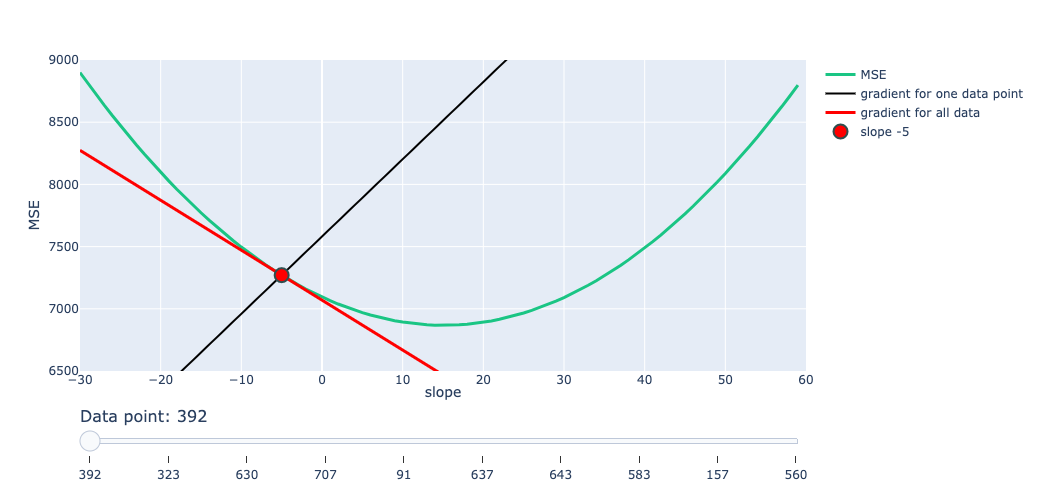

In [25]:
plot_random_gradients(x, y, w=w[1], seed=2020)  # re-run to get different datapoints

- Notice here that at a slope of -5, our single-point gradients vary in direction and magnitude
- Let's plot a histogram of the gradient of each data point at a slope of -5:

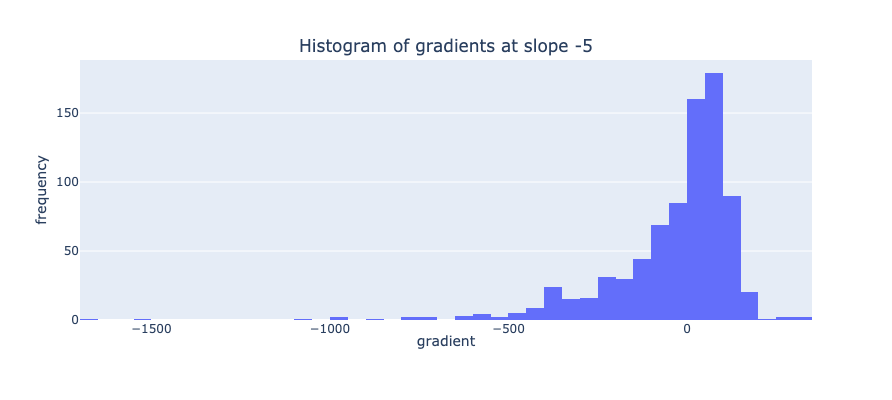

In [26]:
plot_gradient_histogram(x, y, w=w[1])

- The histogram is left-skewed, indicating that more often that not, our gradient is negative (i.e., we need to increase our slope to decrease our loss - if you look at the plot above this one, you'll see that makes sense!)
- This means that we're **more likely to move towards the minimum even if we only use a single data point!**
- Hopefully you're semi-convinced that using just one data point is computational way faster, and mathematically not a totally horrible idea
- Let's see stochastic gradient descent in action in the 2d case:
    - It's pretty much the same as we saw last lecture, except that we pick a random data point at which to calculate the gradient (which is why we call it "stochastic")
    - I've also removed the "tolerance" termination criteria for simplicity

In [27]:
def stochastic_gradient_descent(x, y, w, alpha, num_iterations=300, print_progress=100, seed=None):
    """Stochastic gradient descent for simple linear regression."""
    
    print(f"Iteration 0. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")
    iterations = 1        # init iterations
    if seed is not None:  # init seed (if given)
        np.random.seed(seed)
        
    while iterations <= num_iterations:
        i = np.random.randint(len(x))            # <--- this is the only new bit! <---
        g = gradient(w, x[i, None], y[i, None])  # calculate current gradient
        w -= alpha * g                           # adjust w based on gradient * learning rate
        if iterations % print_progress == 0:     # periodically print progress
            print(f"Iteration {iterations}. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")
        iterations += 1  # increase iteration
        
    print("Terminated!")
    print(f"Iteration {iterations - 1}. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")

In [28]:
w = [-20, -5]
alpha = 0.01
X = np.hstack((np.ones((len(x), 1)), x[:, None]))
stochastic_gradient_descent(X, y, w, alpha, seed=2020)

Iteration 0. Intercept -20.00. Slope -5.00.
Iteration 100. Intercept 69.19. Slope 21.12.
Iteration 200. Intercept 76.37. Slope 18.07.
Iteration 300. Intercept 78.32. Slope 17.21.
Terminated!
Iteration 300. Intercept 78.32. Slope 17.21.


- The correct values are:

In [29]:
m = LinearRegression().fit(np.atleast_2d(x).T, y)
print(f"sklearn Intercept = {m.intercept_:.2f}")
print(f"sklearn Slope = {m.coef_[0]:.2f}")

sklearn Intercept = 77.86
sklearn Slope = 15.07


- We got pretty close! Let's see the path we took:

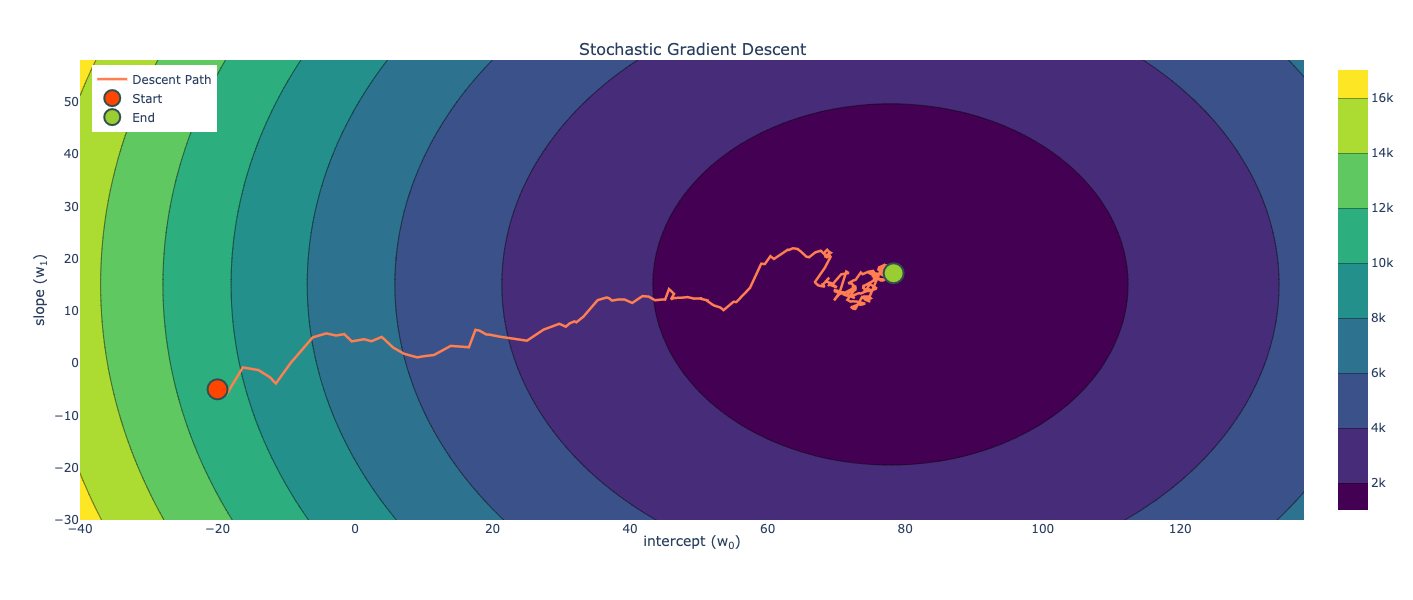

In [30]:
plot_gradient_descent_2d(x, y, w, alpha, np.arange(-30, 60, 2), np.arange(-40, 140, 2), max_iterations=300, stochastic=True, seed=2020)

- Above, we get to the minimum fairly quickly and then bounce around
- But notice how we bounce around a bit - we get thise "noise" because we are only basing our adjustment on one data point. Remember, each data point has it's own idea of what the parameters should be. But it turns out that most of them move us in the right direction (it's just a bit noisey)!
- Let's compare the result to regular gradient descent:

In [31]:
def gradient_descent(x, y, w, alpha, ϵ=2e-4, max_iterations=5000, print_progress=100):
    """Gradient descent for optimizing simple linear regression."""
    
    print(f"Iteration 0. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")
    iterations = 1  # init iterations
    dw = np.array(2 * ϵ)      # init. dw
    
    while abs(dw.sum()) > ϵ and iterations <= max_iterations:
        g = gradient(w, x, y)  # calculate current gradient
        dw = alpha * g         # change in w
        w -= dw                # adjust w based on gradient * learning rate
        if iterations % print_progress == 0:  # periodically print progress
            print(f"Iteration {iterations}. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")
        iterations += 1        # increase iteration
        
    print("Terminated!")
    print(f"Iteration {iterations - 1}. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")

In [32]:
gradient_descent(X, y, w, alpha)

Iteration 0. Intercept -20.00. Slope -5.00.
Iteration 100. Intercept 64.88. Slope 12.41.
Iteration 200. Intercept 76.14. Slope 14.72.
Iteration 300. Intercept 77.63. Slope 15.02.
Iteration 400. Intercept 77.83. Slope 15.06.
Terminated!
Iteration 466. Intercept 77.85. Slope 15.07.


- This got us the *exact* same answer as sklearn, let's take a look at the path:

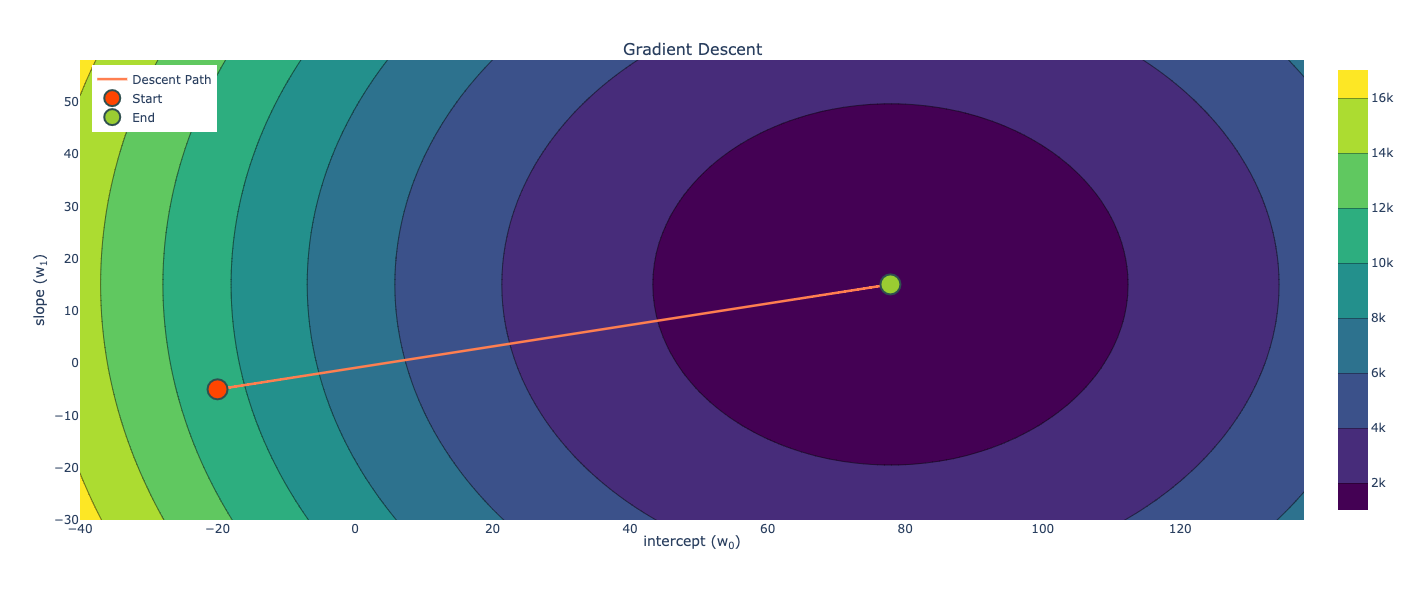

In [33]:
plot_gradient_descent_2d(x, y, w, alpha, np.arange(-30, 60, 2), np.arange(-40, 140, 2))

- Obviously vanilla GD looks nice above, but consider the computational savings
- In SGD we converged after 300 "iterations": 1 iteration = 1 data point, **so we did 300 computations**
- In GD we converged after 466 "iterations": 1 iteration = 801 data points, **so we did 466 x 801 = 373,266 computations**

## 3. Mini-batch Gradient Descent
<hr>

- Okay so it appears SGD is computationally better than GD, but GD is more accurate
- Is there an in-between compromise? Yes!
- Enter: minibatch stochastic gradient descent
- The idea here is simple, rather than calculating the gradient from just one random point, calculate it based on a "batch" of points:

In [34]:
batch_size = 5
i = np.random.choice(range(len(X)), batch_size)
print("Selected point:")
display(df.iloc[i])
print("   Gradient of: [intercept, slope]")
print(f"      All data: {[round(_, 2) for _ in gradient(w, X, y)]}")
print(f"Data point {i[0]:03}: {[round(_, 2) for _ in gradient(w, X[i], y[i])]}")

Selected point:


name  attack  defense
65       Machop      80       50
278    Pelipper      50      100
4    Charmeleon      64       58
19     Raticate      71       70
605    Beheeyem      75       75

   Gradient of: [intercept, slope]
      All data: [-195.72, -40.14]
Data point 065: [-175.22, 19.69]


- We would still expect the gradient calculated from a batch to be different to the gradient calculated using all the data, but not as different to using only a single point
- Once again let's visualize this for just the slope parameter to drive the point home:

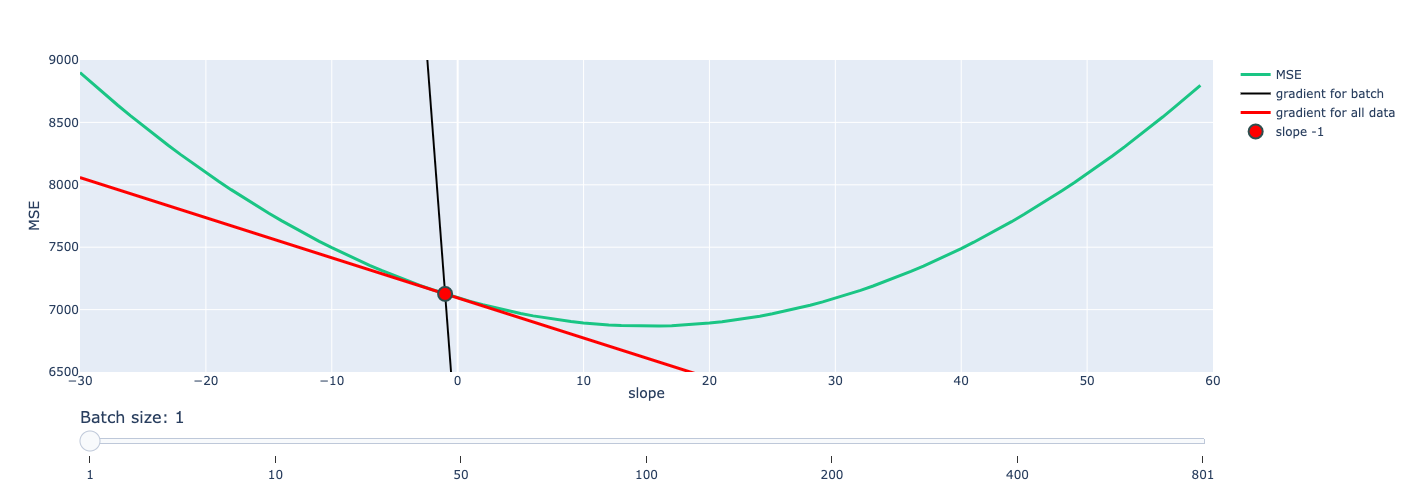

In [17]:
plot_minibatch_gradients(x, y, w=-1, batch_sizes=[1, 10, 50, 100, 200, 400, len(x)], seed=2020)

- The larger the batch, the closer we are to the gradient calculated using the whole dataset
- But also the bigger the batch, the more computations will be needed!
- Let's code it up, the code is almost the same as before but we are choosing `batch_size` random points now
> We'll be sampling without replacement in each iteration, I'll talk about that more later.

In [36]:
def minibatch_gradient_descent(x, y, w, alpha, batch_size, num_iterations=300, print_progress=100, seed=None):
    """Minibatch gradient descent for simple linear regression."""
    
    print(f"Iteration 0. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")
    iterations = 1        # init iterations
    if seed is not None:  # init seed (if given)
        np.random.seed(seed)
        
    while iterations <= num_iterations:
        i = np.random.choice(range(len(x)), batch_size, replace=False)  # <--- this is the only new bit! <---
        g = gradient(w, x[i], y[i])              # calculate current gradient
        w -= alpha * g                           # adjust w based on gradient * learning rate
        if iterations % print_progress == 0:     # periodically print progress
            print(f"Iteration {iterations}. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")
        iterations += 1  # increase iteration
        
    print("Terminated!")
    print(f"Iteration {iterations - 1}. Intercept {w[0]:.2f}. Slope {w[1]:.2f}.")

In [37]:
batch_size = 10
minibatch_gradient_descent(X, y, w, alpha, batch_size=batch_size, seed=2020)

Iteration 0. Intercept -20.00. Slope -5.00.
Iteration 100. Intercept 65.25. Slope 11.61.
Iteration 200. Intercept 75.84. Slope 12.49.
Iteration 300. Intercept 77.67. Slope 14.42.
Terminated!
Iteration 300. Intercept 77.67. Slope 14.42.


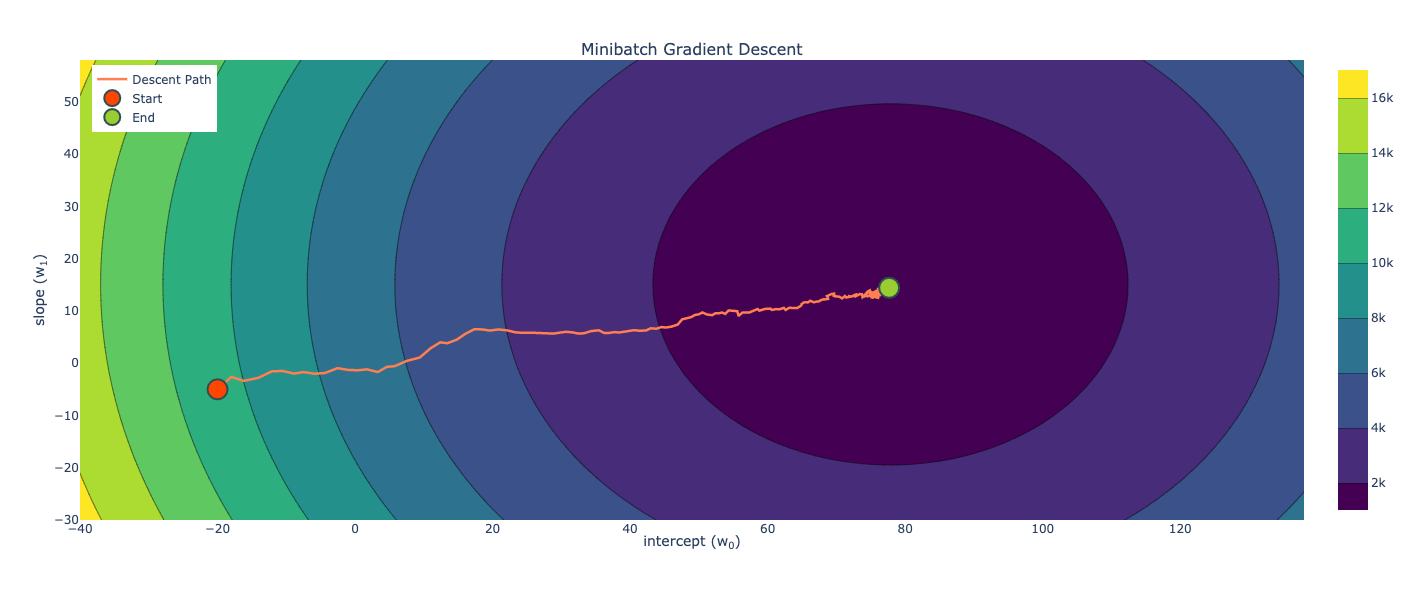

In [38]:
plot_gradient_descent_2d(x, y, w, alpha, np.arange(-30, 60, 2), np.arange(-40, 140, 2), max_iterations=300, stochastic=True, batch_size=batch_size, seed=2020)

- Above, we still get the "wobbliness" of SGD but it's much smoother now!
- All together now!

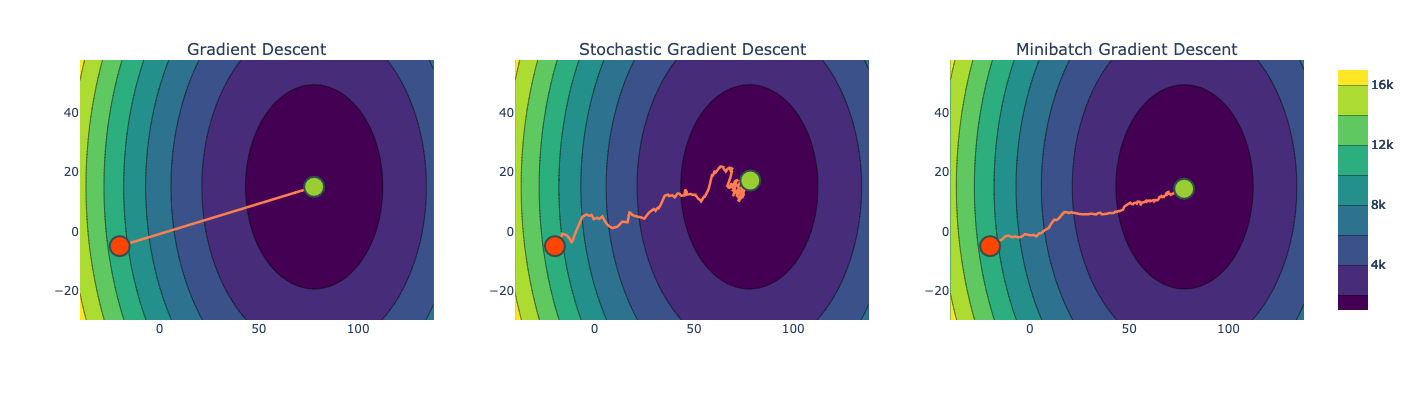

In [39]:
f1 = plot_gradient_descent_2d(x, y, w, alpha, np.arange(-30, 60, 2), np.arange(-40, 140, 2))
f2 = plot_gradient_descent_2d(x, y, w, alpha, np.arange(-30, 60, 2), np.arange(-40, 140, 2), max_iterations=300, stochastic=True, seed=2020)
f3 = plot_gradient_descent_2d(x, y, w, alpha, np.arange(-30, 60, 2), np.arange(-40, 140, 2), max_iterations=300, stochastic=True, batch_size=batch_size, seed=2020)
plot_panel(f1, f2, f3)

|Method|Intercept|Slope|Iterations|Data Per Iteration|Data Points Used|
|---|---|---|---|---|---|
|sklearn|77.86|15.07|-|-|-|
|GD|77.85|15.07|466|801|373,266|
|SGD|76.33|11.26|300|1|300|
|MGD|75.60|15.09|300|10|3000|

## 4. Terminology
<hr>

- Assume we have a dataset of $n$ observations (rows)
- There are three terms you need to know when it comes to gradient descent:
    - **Iteration**: each time you update model weights
    - **Batch**: a subset of data used in an iteration
    - **Epoch**: the number of iterations to look at all $n$ observations (people sometimes also say a "full pass through the dataset")
- Let's put those defintions in context:
    - In GD, each iteration involves computing the gradient over all examples, so $1 \text{ iteration} = 1 \text{ epoch}$
    - In SGD, each iteration involves one data point, so $n \text{ iterations} = 1 \text{ epoch}$
    - In MGD, each iteration involves a batch of data, so $\frac{n}{\text{batch size}} \text{ iterations} = 1 \text{ epoch}$
- From our examples above (recall that $n=801$):

|Method|Iterations|Data Per Iteration (batch size)|Epochs|
|---|---|---|---|
|GD|466|801|466|
|SGD|300|1|0.37|
|MGD|300|10|3.74|

- In practice nobody really says "minibatch SGD", we just say SGD: in SGD you can specify a batch size of anything between 1 and $n$
- So, why do we bother with all this hassle??
- Because we want a quantity to talk about that is meaningful to humans:
    - "I did 10 iterations of GD" means something (that's 10 full passes through the dataset).
    - "I did 10 iterations of SGD" means nothing to me (it depends what the batch size is).
    - "I did 10 epochs of SGD" has more meaning to me (that's 10 full passes through the dataset). 

## 5. Final Remarks
<hr>

### 5.1. Sampling With or Without Replacement

- When doing SGD we really have 3 options:
    1. Shuffle the dataset and pre-divide it into batches, like cross-validation. This is "without replacement", every example is used once.
    2. Sample a batch each iteration without replacement, so you won't have the same sample occuring more that once in a batch but you might have the same example in both batch 1 and batch 2. Every example may not be used in this approach.
    3. Like Approach 2, but even each batch is sampled with replacement, so you might have the same example twice in batch 1. Every example may not be used in this approach.
- We typically use approach 1 or 2 (the default in Pytorch, the deep learning package we'll be using, in approach 1)
- Empirically, sampling without replacement tends to lead to more optimal solutions/faster convergence and this has been [proved mathematically in some cases](https://arxiv.org/pdf/1202.4184v1.pdf)

### 5.2. Learning Rate

- Up until now we've been using a constant learning rate ($\alpha$) in our algorithms
- There are two main ways we could potentially improve on this naive method:
    1. Use an "adaptive" learning rate - where we take big steps when we are far from the minimum of our loss function, and smaller steps when we are close to it;
    2. Use "momentum" - using how our learning rate has changed in past iterations to influence how it changes in future iterations
- But often when people use SGD they leave $\alpha$ constant and things tend to work out okay
- However these days in practice we use fancier variants of GD, such as Adam, which include more bells and whistles such as those I describe above. We'll be using Adam a lot through the rest of this course.
- These algorithms get pretty complex and it's beyond the scope of the course to know exactly how to derive them, but just know they are essentially fancier versions of GD (coding up Adam will be an optional question in the lab this week and if you're interested in reading more about these kinds of algorithms, see e.g. [here](https://ruder.io/optimizing-gradient-descent/))

### 5.3. Local Minima

- In Lab 1 we looked at how optimization algorithms like gradient descent are susceptible to getting stuck in local minima
- SGD can help with this a bit due to the "jumpy" randomness in the search, but the main advantage of SGD vs GD is the computational savings
- The above mentioned fancy algorithms like Adam that include things like momentum and adaptive learning rates are better designed to speed up convergence and try and avoid local minima. Here's a comparison of SGD vs Adam from my solution for the optional question in Lab 2 - notice how SGD gets "stuck" in a local minima, while Adam is able to navigate all the way to the global minima:

![](img/adam.png)

## 6. Lecture Exercise: True/False Questions
<hr>

Answer True/False for the following:

1. In an iteration of stochastic gradient the loss might go up. (**True**)
2. Increasing the batch size results in slower, but better, iterations. (**True**)
3. One *epoch* of stochastic gradient takes about the same amount of time as one *iteration* of gradient descent. (**True**)
4. Stochastic gradient with a minibatch size of $n$ is the same thing as gradient descent. (**True**)
5. If you double the number of epochs and double the batch size, then nothing has changed with your optimization. (**False**)
6. The main benefit of stochastic gradient descent is that it can help avoid local minima. (**False**)

## 7. The Lecture in Three Conjectures
<hr>

1. SGD is a variant of GD that uses a fraction of the dataset to update weights in each iterations.
2. In practice, we use algorithms like Adam for optimization, but they are really just fancier versions of SGD.
3. Terminology is important:
    - Iteration: each time you update model weights
    - Batch: a subset of data used in an iteration
    - Epoch: the number of iterations to look at all $n$ observations

![](img/mission.png)